# 18. Segmentation - GrabCut

In [6]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

from utils import show_image

plt.rcParams['figure.figsize'] = [8, 10]

### Segment some color images using the GrabCut algorithm – `cv.grabCut()`. Try different initialization modes: bounding rectangle or mask mode.

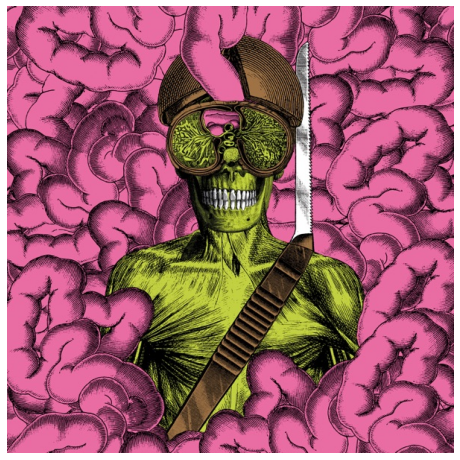

In [7]:
image = cv2.imread("Images/dream.jpg") 

show_image(image)

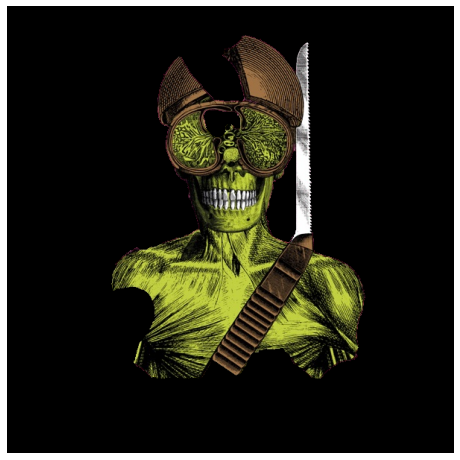

In [17]:
# Defining the image mask for the GrabCut output
# It has the same spatial dimensions as the input image
mask = np.zeros(image.shape[:2], np.uint8)

# Define the bounding box coordinates that approximately delimits the object of interest: (x, y, width, heigh)
rect = (0, 0, 500, 500)

# Allocating memory for the two arrays that this algorithm internally uses for the segmentation of the foreground and background
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

# Number of iterations the algorithm will run
n = 5

# Applying GrabCut, using the defined bounding box
(mask, background_model, foreground_model) = cv2.grabCut(image, mask, rect, background_model, foreground_model, n, cv2.GC_INIT_WITH_RECT)

# All definite background and probable background pixels are set to 0, and all definite foreground and probable foreground pixels are set to 1
output_mask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1)

# Scale the mask from the range [0, 1] to [0, 255]
output_mask = (output_mask * 255).astype("uint8")

# Apply a bitwise AND to the image using the generated mask by GrabCut, obtaining the final output
grabcut_output = cv2.bitwise_and(image, image, mask=output_mask)

show_image(grabcut_output)